In [3]:
#Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

np.random.seed(42)

sns.set_style('whitegrid')
%matplotlib inline


In [4]:
#Exploratory Data Analysis

customers = pd.read_csv('/content/customer_segmentation(1).csv')

customers.head()



,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [5]:
customers.shape


(10127, 14)

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

Data dictionary

    customer_id: unique identifier for each customer.
    age: customer age in years.
    gender: customer gender (M or F).
    dependent_count: number of dependents of each customer.
    education_level: level of education ("High School", "Graduate", etc.).
    marital_status: marital status ("Single", "Married", etc.).
    estimated_income: the estimated income for the customer projected by the data science team.
    months_on_book: time as a customer in months.
    total_relationship_count: number of times the customer contacted the company.
    months_inactive_12_mon: number of months the customer did not use the credit card in the last 12 months.
    credit_limit: customer's credit limit.
    total_trans_amount: the overall amount of money spent on the card by the customer.
    total_trans_count: the overall number of times the customer used the card.
    avg_utilization_ratio: daily average utilization ratio.

Other observations

    There appear to be no empty values in the entire data set
    The gender, education_level and marital_status columns are categorical, so we'll have to encode them later for our analysis.
    Its already clear that we won't need customer_id for analysis. All the other columns could be required for analyis.


In [7]:
for col in ['gender', 'education_level', 'marital_status']:
    print(col)
    print(customers[col].value_counts(), end='\n\n')

gender
gender
F    5358
M    4769
Name: count, dtype: int64

education_level
education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: count, dtype: int64

marital_status
marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64



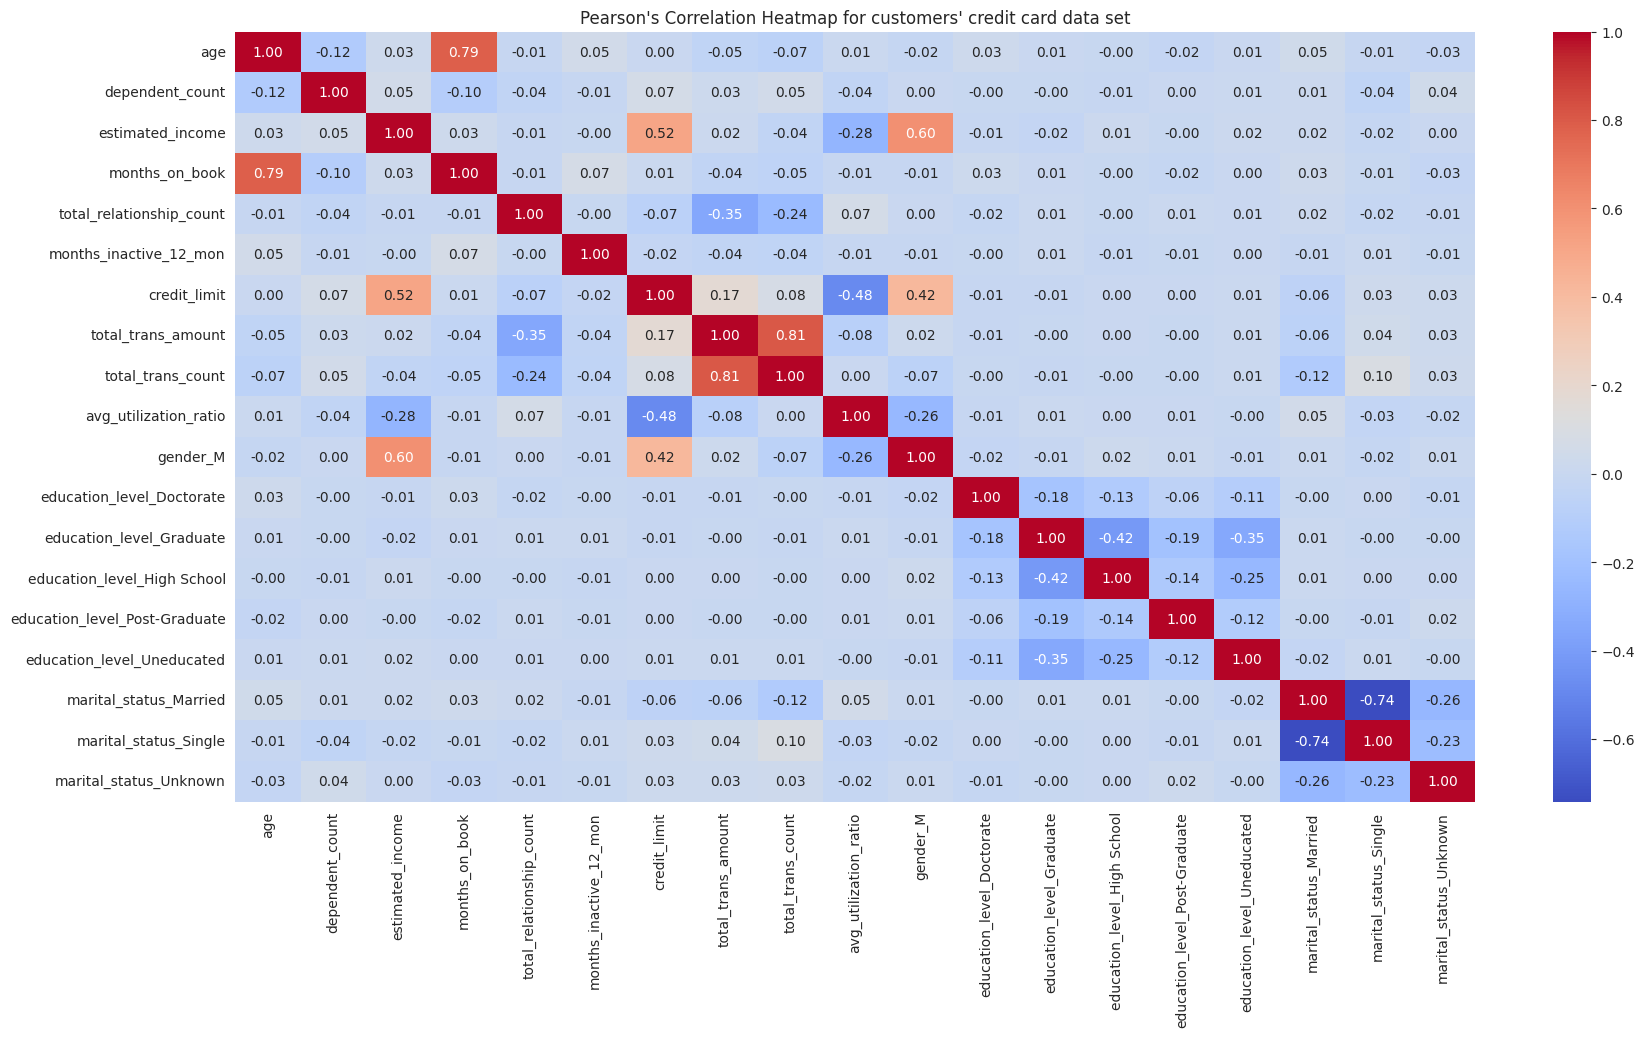

In [15]:
# Remove the customer_id column as its not needed.
customers = customers.drop(columns='customer_id')

# Create a copy of the dataframe
customers_dummies = customers.copy()

# Encode the categorical columns by creating dummy variables and preview the first 5 rows
customers_dummies = pd.get_dummies(customers_dummies, drop_first=True)
customers_dummies.head()

# Calculate Pearson's correlation coefficient
correlation_matrix = customers_dummies.corr()

# Generate a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson's Correlation Heatmap for customers' credit card data set")
plt.show()


    age with months_on_book. This makes sense as its likely that older customers have been clients for longer.

    gender with estimated_income and credit_limit. Also makes sense as its displays known gender inequality when it comes to compensation and resulting credit score.

    total_trans_count with total_trans_amount. Also makes sense as the more number of transactions with the client, the more likely the total amount.
    
    avg_utilization_ratio with credit_limit. There is a medium strong correlation, which makes sense as a higher credit limit will encourage more use.


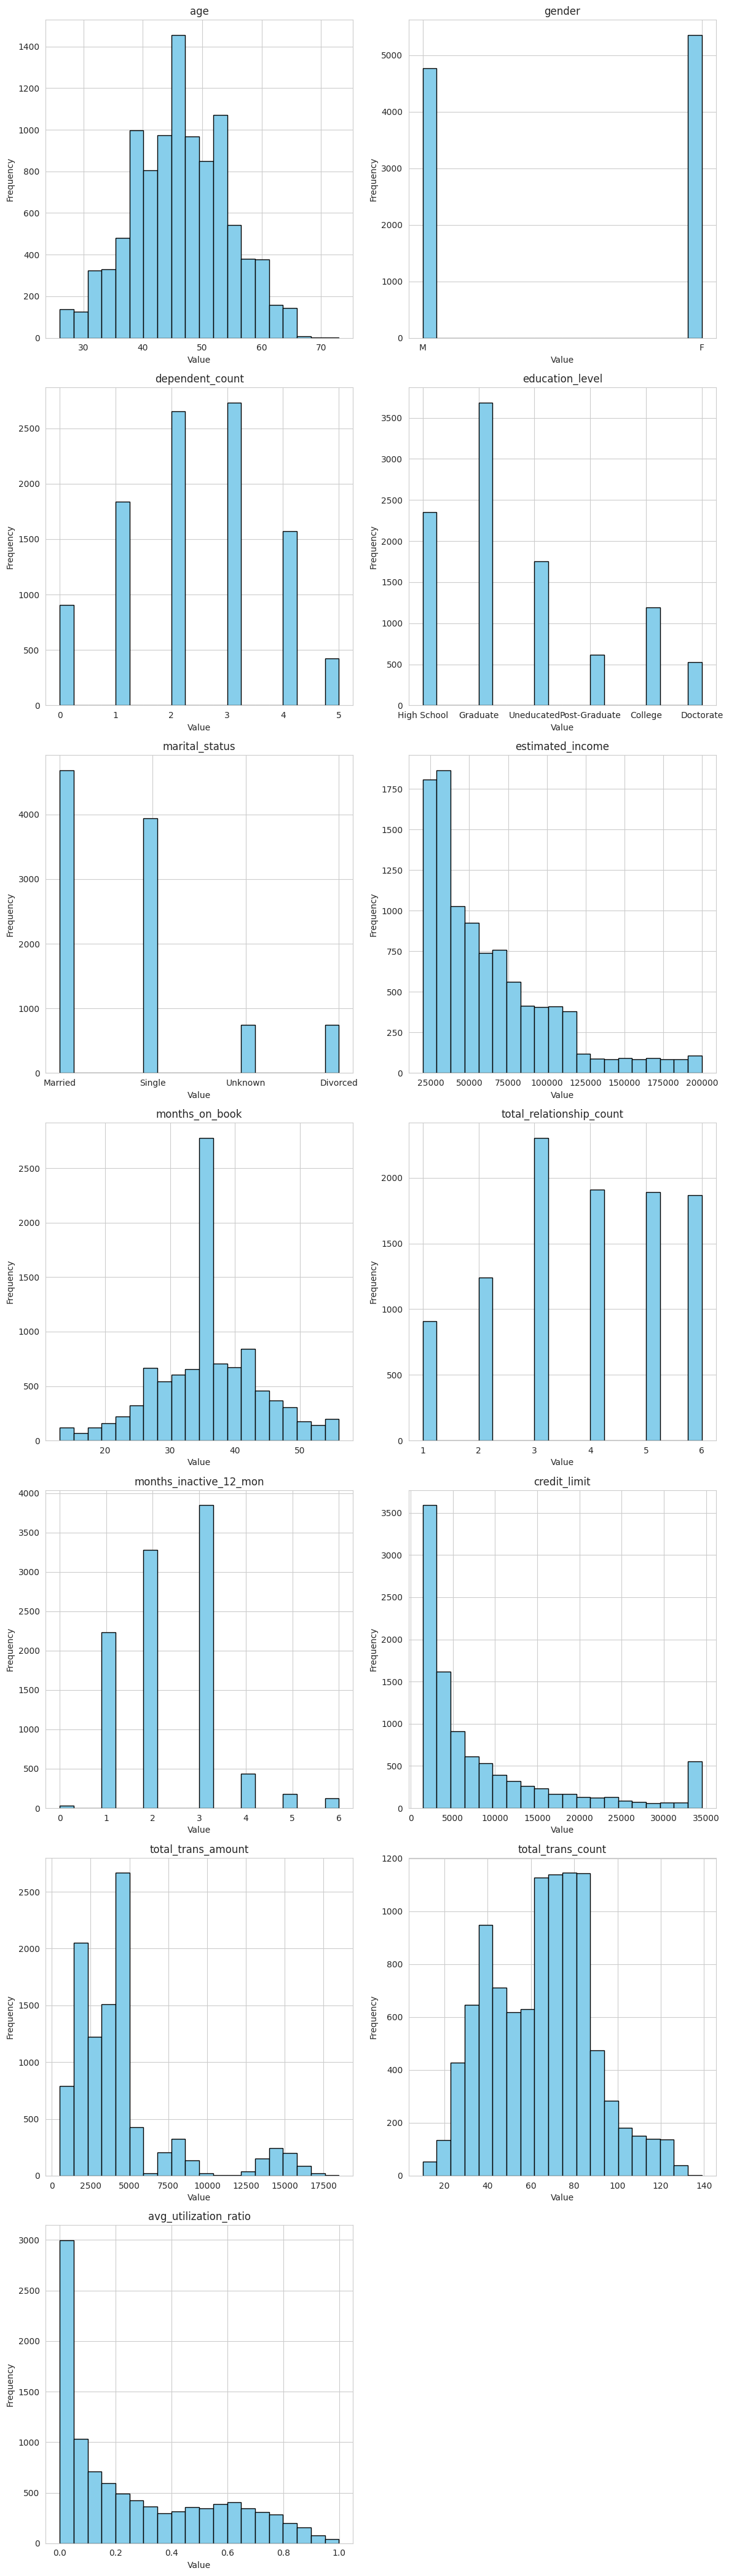

In [9]:
# Plot distributions of each column's values
def plot_histograms(df):
    num_cols = df.shape[1]
    num_rows = (num_cols + 1) // 2  # Number of rows for subplots

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        ax = axes[i]
        ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    # If the number of columns is odd, remove the empty subplot
    if num_cols % 2 != 0:
        fig.delaxes(axes[num_cols])

    plt.tight_layout()
    plt.show()

# Call the function on the customer dataframe, without the 'customer_id' column
plot_histograms(customers)

Here are some comments to noteworthy observations to the distributions of values of the data set:

    age: there is a good distribution between young and old clients, although most are in the 40-50 years old range.

    gender: females are slightly more resprented than males
    estimated_income and credit_limit: by far, most customers are in the lower income range, which reflects too on the credit_limitas commented before.

    months_on_book shows a large outlier for the number 34. Perhaps this is the point in time when the company started onboarding customers.

    utilisation_ratio is mostly represented by low-usage customers, with a slight increase between 50%-70% usage customers
    
    total_trans_count and total_trans_count are both skewed to the right (positively skewed), indicating that there is less representation with higher values.


In [10]:
customers_modif = customers.copy()
customers_modif['gender'] = customers['gender'].apply(lambda x: 1 if x == 'M' else 0)
customers_modif.head()

,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,45,1,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,49,0,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,51,1,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,40,0,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,40,1,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [11]:
customers_modif.replace(to_replace={'Uneducated': 0, 'High School': 1, 'College':2,
                                    'Graduate': 3, 'Post-Graduate': 4, 'Doctorate':5}, inplace=True)
customers_modif['education_level'].head()

,education_level
0,1
1,3
2,3
3,1
4,0


In [12]:
dummies = pd.get_dummies(customers_modif[['marital_status']], drop_first=True)

customers_modif = pd.concat([customers_modif, dummies], axis=1)
customers_modif.drop(['marital_status'], axis=1, inplace=True)

print(customers_modif.shape)
customers_modif.head()

(10127, 15)


,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,True,False,False
1,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,True,False
2,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,True,False,False
3,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,True
4,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,True,False,False


In [20]:
# Check if 'customer_id' exists in the DataFrame
if 'customer_id' in customers_modif.columns:
    X = customers_modif.drop('customer_id', axis=1)
else:
    # Handle the case where 'customer_id' is not found (e.g., print a message or skip the operation)
    print("Column 'customer_id' not found in DataFrame.")
    X = customers_modif.copy()

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled[:5]

Column 'customer_id' not found in DataFrame.


array([[-0.16540558,  1.05995565,  0.50336813, -0.75221102,  0.1758098 ,
         0.38462088,  0.76394261, -1.32713603,  0.4466219 , -0.95970657,
        -0.97389518, -0.77588223,  1.07733799, -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867,  0.66278684, -0.96716585,
         1.01071482,  1.40730617, -1.32713603, -0.04136665, -0.91643261,
        -1.35734038, -0.61627565, -0.92821381,  1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813,  0.66278684,  0.78539682,
         0.00896451,  0.12057905, -1.32713603, -0.5736978 , -0.74098169,
        -1.91120566, -0.99715499,  1.07733799, -0.79850685, -0.28260887],
       [-0.78912553, -0.9434357 ,  1.2732834 , -0.75221102, -0.63697289,
        -0.24147306, -0.52278451,  1.64147829, -0.58525108, -0.95175829,
        -1.91120566,  1.75968594, -0.92821381, -0.79850685,  3.53845931],
       [-0.78912553,  1.05995565,  0.50336813, -1.45970995,  0.07421197,
        -1.86931731,  0.76394261, -1.32713603, 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

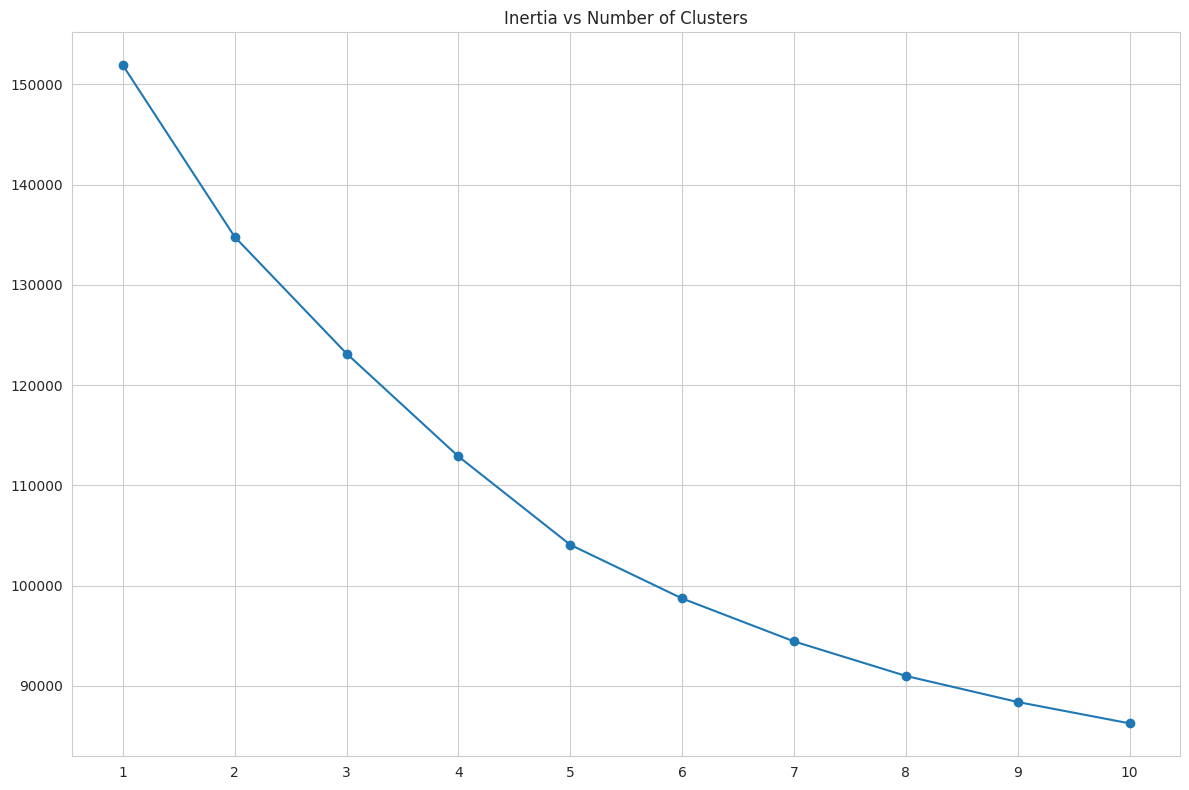

In [21]:
X = pd.DataFrame(X_scaled)
inertias = []

for k in range(1, 11):
    model = KMeans(n_clusters=k)
    y = model.fit_predict(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()


In [22]:
model = KMeans(n_clusters=6)
y = model.fit_predict(X_scaled)

y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 2, 3, ..., 5, 4, 5], dtype=int32)

In [23]:
customers['CLUSTER'] = y + 1
customers

,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,4
1,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,3
2,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,4
3,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,5
4,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462,2
10123,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511,6
10124,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000,6
10125,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000,5


In [24]:
customers['CLUSTER'].value_counts()

,count
CLUSTER,
6,2786
3,2491
4,1758
1,1449
2,913
5,730


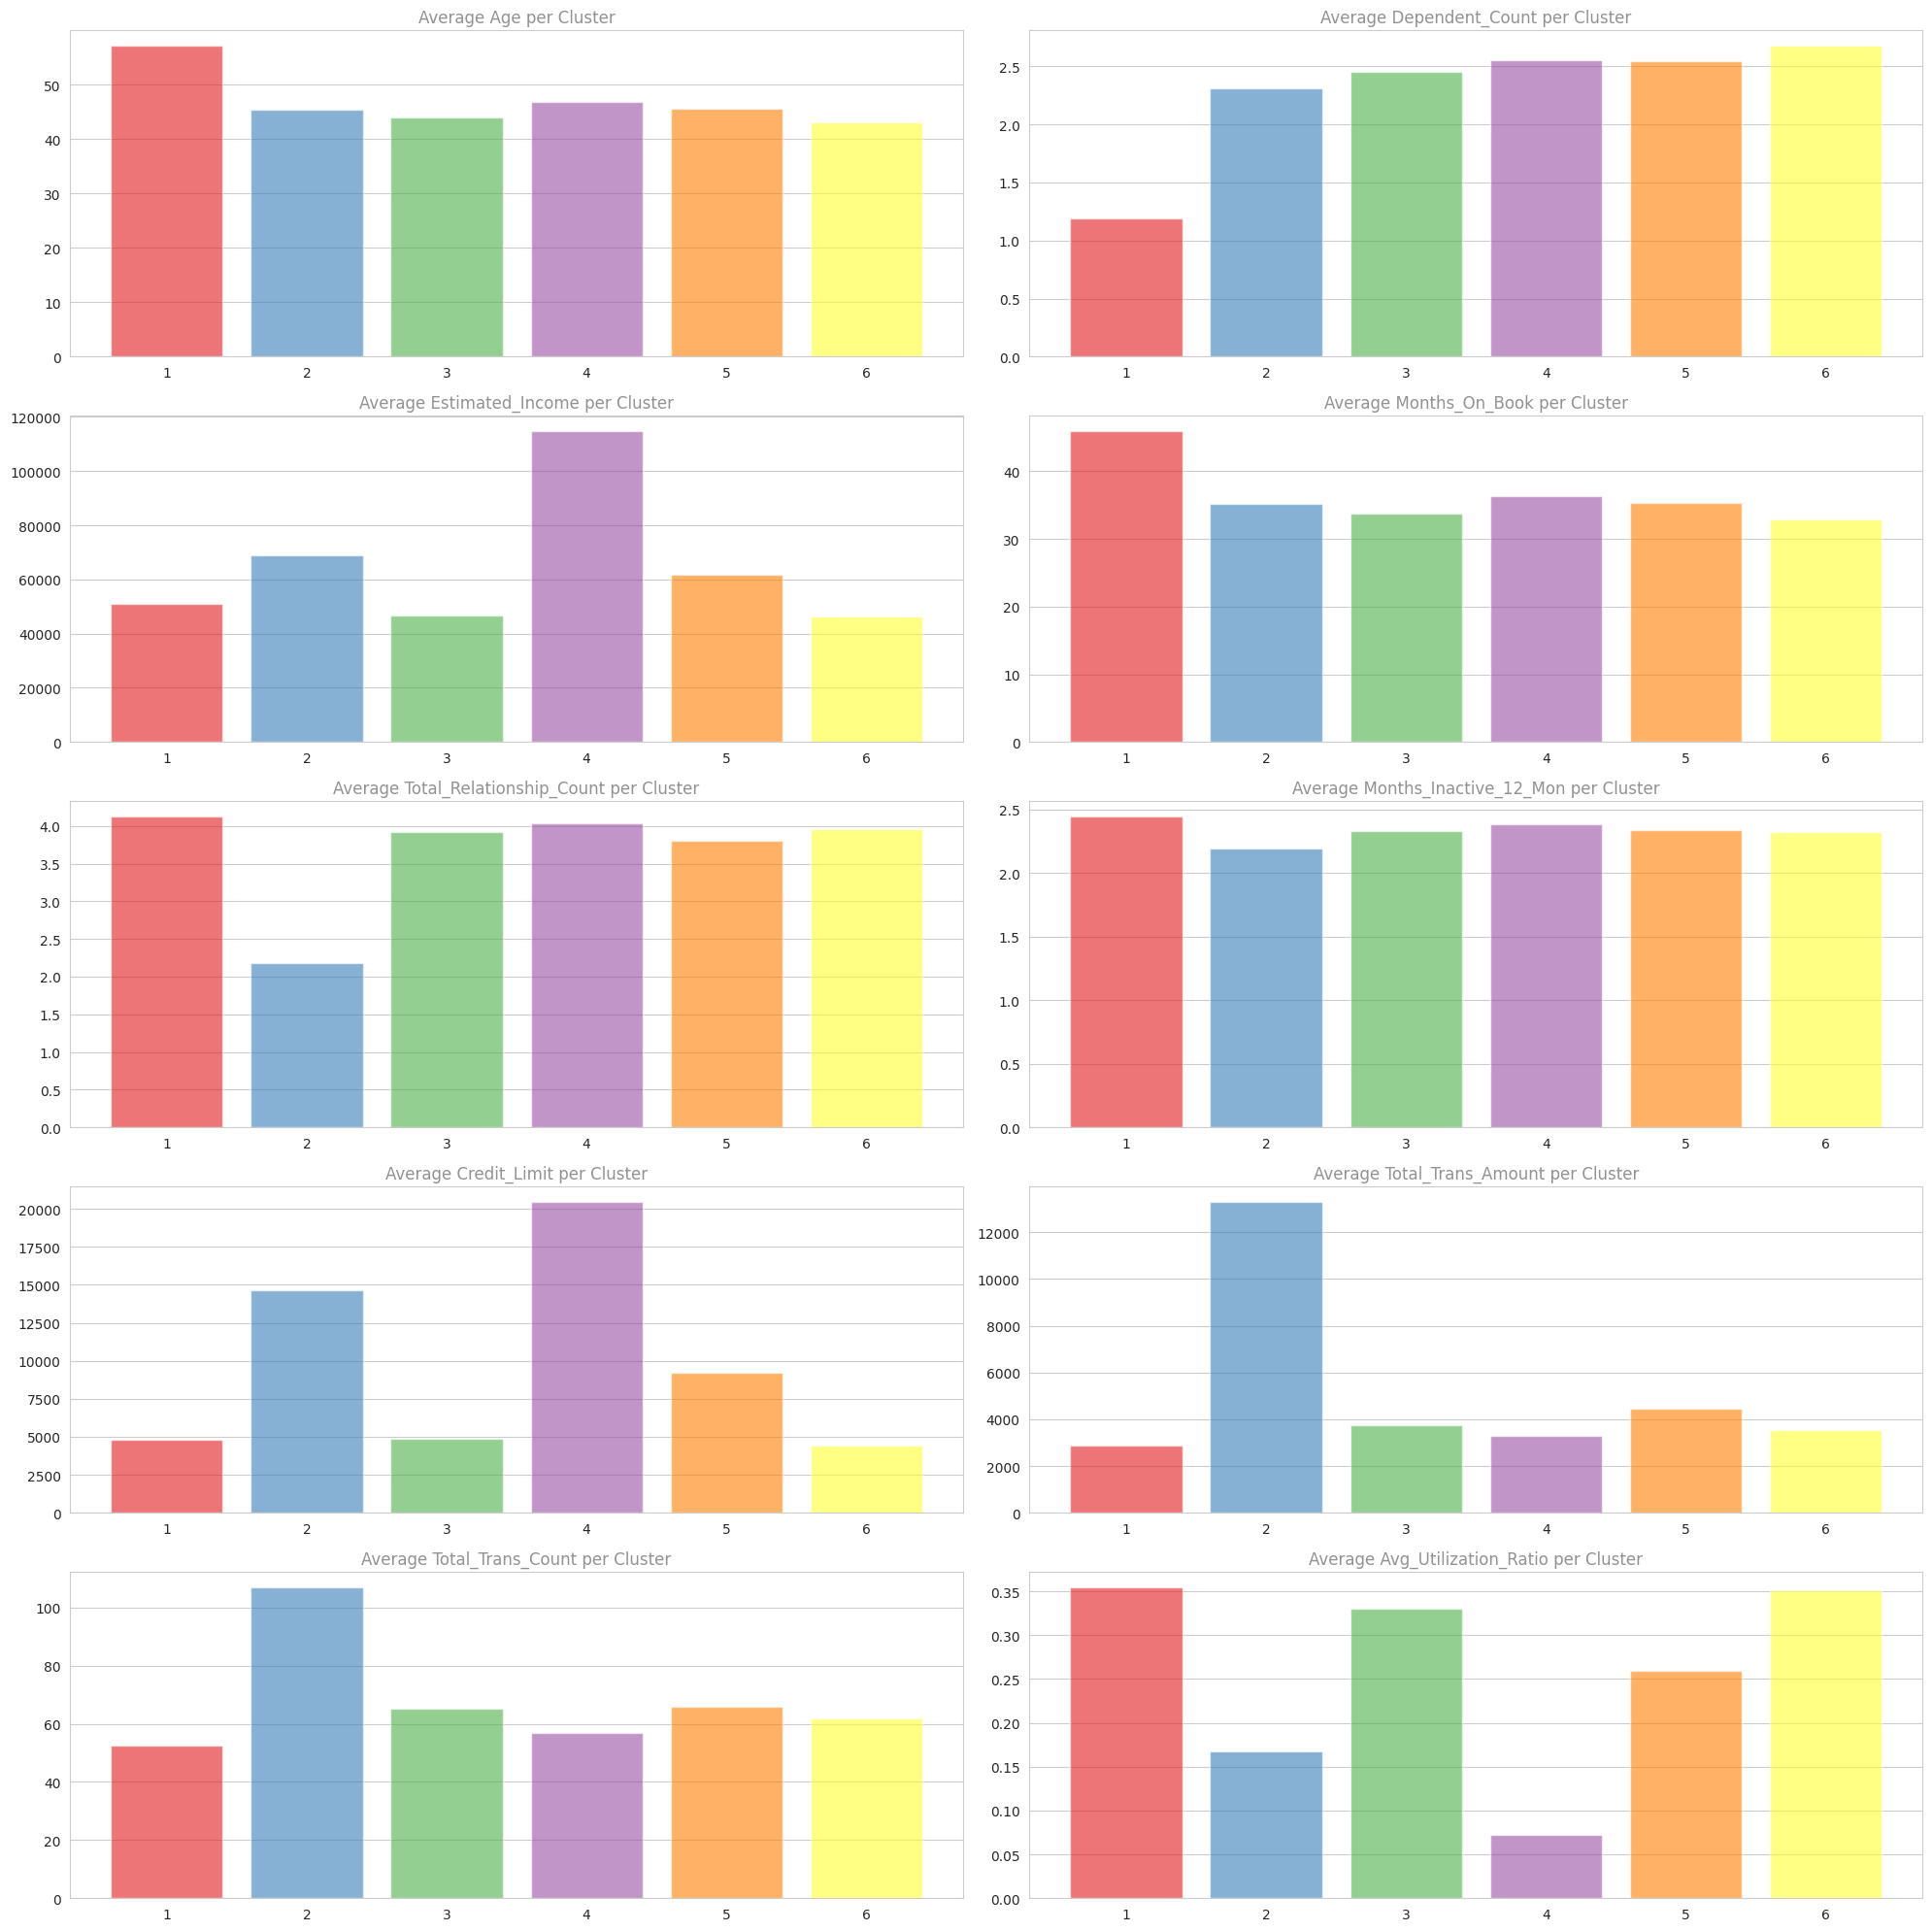

In [27]:
numeric_columns = customers.select_dtypes(include=np.number).drop(['CLUSTER'], axis=1).columns # Removed 'customer_id' from the list of columns to drop

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = customers.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

Conclusions about clusters for numeric variables

    Age: all clusters have an average age around 40, except cluster 5 which is the highest with close to 60.
    Dependent Count: Most clusters are 2-2.5, except cluster 5 which is only 1.

    Estimated Income: Cluster 3 has the highest with over 100'000.

    Months on Book: Most clusters are 30-35, except cluster 5 which is just under 50.

    Total Relationship Count: all clusters have an average TRC close to 4, except cluster 6 which is the lowest with about 2.

    Months Inactive 12 Mon: all clusters are around 2 on average.
    Credit Limit: Clusters 2 and 6 stand out here with values of about 200'000 and 150'000 respectively.

    Total Trans Amount: Most clusters are around 30'000-50'000, except cluster 6 which is about 150'000.

    Total Trans Count: Most clusters are around 50, except cluster 6 which is about 100.

    Utilization Ratio: Clusters 3 (significantly) and cluster 6 are lower than the rest of the clusters, which are at around 0.3.


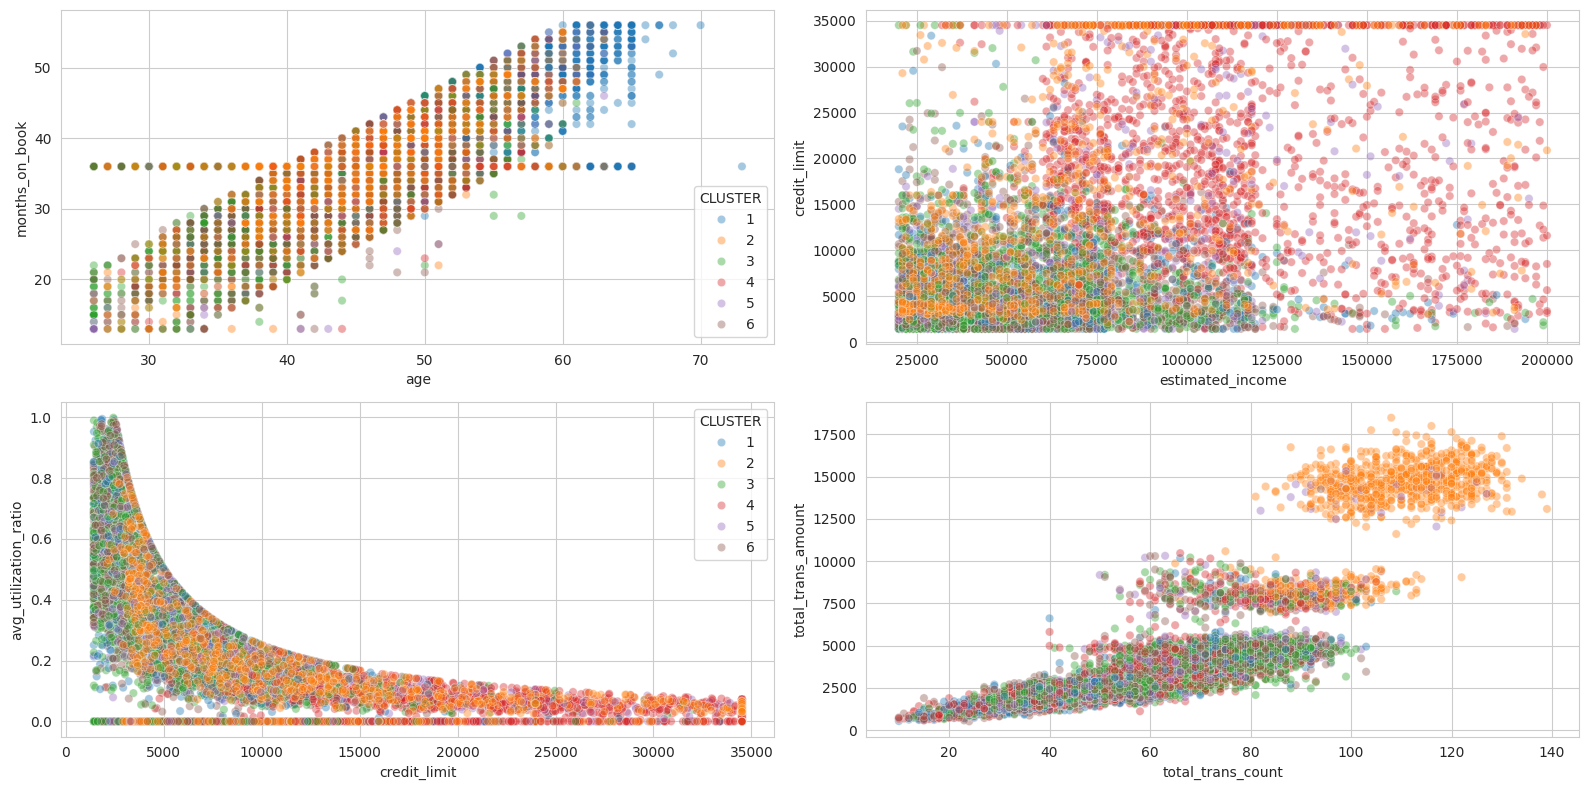

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

Conclusions about highly correlated numeric variables

    1)age over months_on_book at first glance shows a very strong positive linear association across all clusters. However, cluster 5, which are customers aged over 50 and more than 35 months on book appear to be closest in their association

    2)avg_utilization_ratio over credit_limit interestingly shows a strong negative non-linear association not only across all clusters, but by cluster as well. There is also a linear association when the ration is 0, which makes sense as customers have different credit limits but have never used their credit cards.

    3)total_trans_count over total_trans_amount shows what looks like a positive non-linear associate across all clusters, but what's interesting is cluster 6 which indicates customer who make more transactions also have a higher total transaction amount.


<ipython-input-29-e2f1015d4481>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
<ipython-input-29-e2f1015d4481>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
<ipython-input-29-e2f1015d4481>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


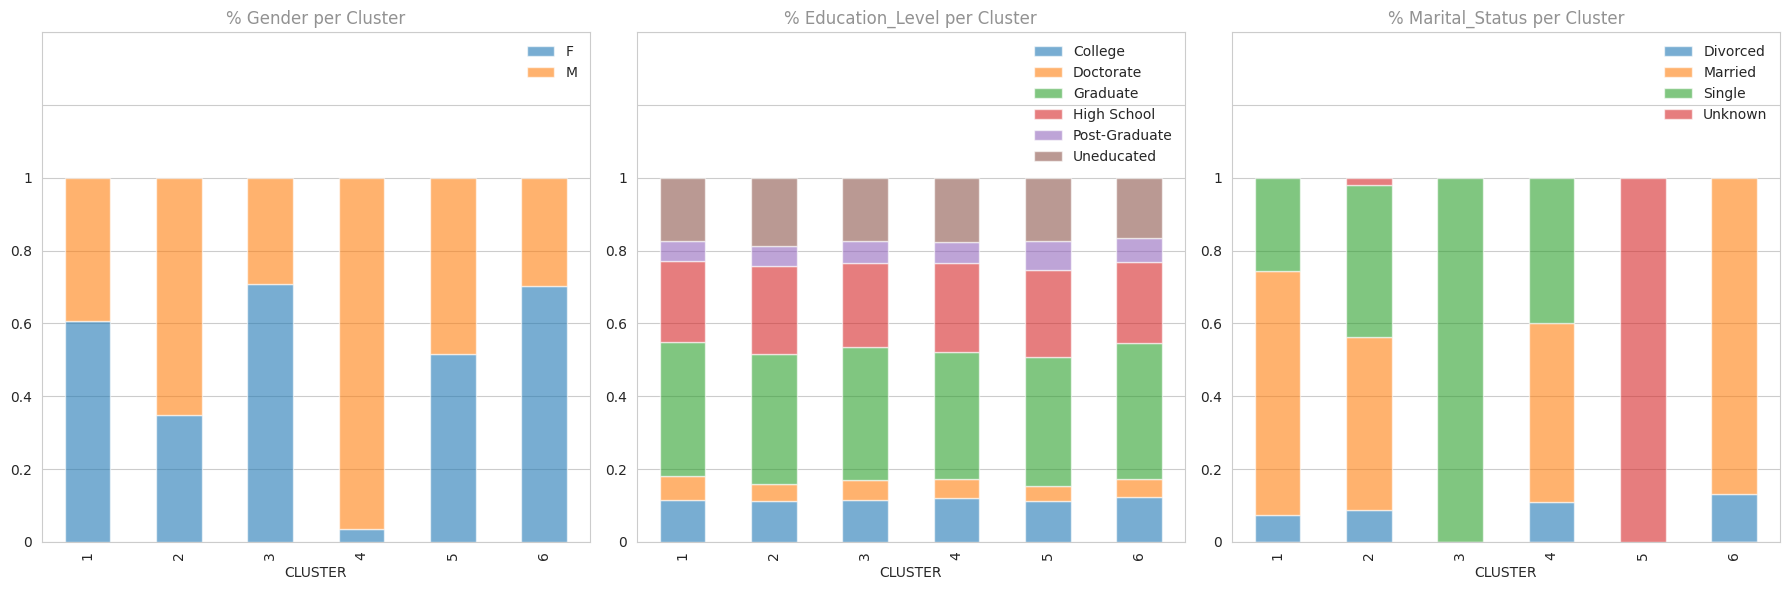

In [29]:
cat_columns = customers.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=customers['CLUSTER'], columns=customers[col], values=customers[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)

    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

Conclusions about clusters for categorical variables

    Gender: Clusters 3 and 6 are consisting mainly of males, whereas the rest are mostly females
    Marital status.: Cluster 1 is completely unknown, whereas cluster 4 is completely single, and cluster 2 is only divorced or married.
    Education level: There seems to be not much difference between the composition of the clusters.

5. Interpret and explain the results

    Cluster 1
        Characteristics: gender well divided, but marital status completely unknown, average income, 2 dependents, average credit limit and utilization ratio.
        Business insights: this is a quite general cluster, no suggestions to change anything here.
    Cluster 2
        Characteristics: mostly married women, more than 2 dependents, lower income, low credit limit with high utilization, high number of transactions with fairly low total amount.
        Business insights: could increase credit limit slightly to possibly increase spending amount
    Cluster 3
        Characteristics: mostly married or single men, high income, high credit limit, low utilization
        Business insights: this cluster probably presents the biggest opportunity to incentivise customers to increase their spending
    Cluster 4
        Characteristics: mostly single women, about 2 dependents, low income, low credit limit with high utilization
        Business insights: similar to cluster 2, could increase credit limit slightly to possibly increase spending amount
    Cluster 5
        Characteristics: high age, gender well divided, mostly married but also singles and divorced, average income, low number of dependents, low credit limit and high utilization ratio.
        Business insights: could be older couples or older singles, they may have larger disposable income. Aim to increase credit limit slightly to possibly increase spending amount.
    Cluster 6
        Characteristics: mostly married or single men, low number of dependents, high total amount, medium credit limit, low utilization ratio, high transaction amount.
        Business insights: could be couples without children or only 1 child, or single men, who spend much at a time. Incentivize to use the card more.

